In [110]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

sys.path.append('/content/drive/My Drive/Global Analysis Covid 19/COVID-19 Project/python notebooks')
import eda1

In [111]:
data = eda1.daywise
#data.columns = data.columns.droplevel(1)
data['Time'] = np.array(range(data.shape[0]))
print(data.shape)
#days since 22-1-2020
t = data.shape[0]
data.head()

(176, 4)


,Date,Confirmed,Deaths,Time
,,sum,sum,
0,2020-01-22,555,17,0
1,2020-01-23,654,18,1
2,2020-01-24,941,26,2
3,2020-01-25,1434,42,3
4,2020-01-26,2118,56,4


In [112]:

from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as rms
from sklearn.metrics import r2_score

In [113]:
scaler = StandardScaler()
feature = data[['Time']].values
target = data['Confirmed'].values
target = target.reshape(-1,1)
target = scaler.fit_transform(target)


In [114]:
trainx,testx, trainy,  testy = train_test_split(feature, target, test_size = 0.2)

rgs = LinearRegression()
rgs.fit(trainx,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
x_fore =np.array(range(t+1, t+101)).reshape(-1,1)
y_pred = rgs.predict(testx)
y_fore = rgs.predict(x_fore)

In [116]:
trainy = scaler.inverse_transform(trainy)
y_pred = scaler.inverse_transform(y_pred)
y_fore = scaler.inverse_transform(y_fore)

In [117]:
rmse = np.sqrt(rms(testy, y_pred))
r2 = r2_score(testy, y_pred)
print('rmse: ',rmse)
print('r2: ',r2)

rmse:  5025960.710508703
r2:  -38384374871976.74


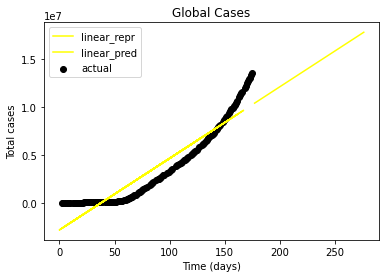

In [118]:
plt.scatter(trainx,trainy, color = 'black')
plt.plot(testx,y_pred, color = 'yellow')
plt.plot(x_fore,y_fore, color = 'yellow')
plt.xlabel('Time (days)')
plt.ylabel('Total cases')
plt.title('Global Cases')
plt.legend(['linear_repr', 'linear_pred', 'actual'])
plt.show()

In [119]:
# the data is being under-fit by the trend line.
#we can see that the curve is not linear. We'll try polynomial regression

rmse:  176783.32409511597
r2:  0.9979948815908354


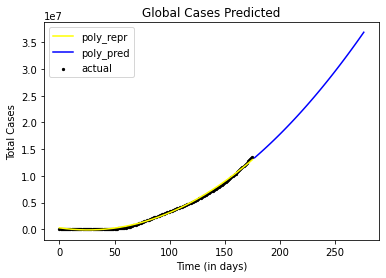

In [120]:
from sklearn.preprocessing import PolynomialFeatures
import operator

scaler = StandardScaler()
x = data[['Time']].values
x = x.reshape(-1,1)
y = data['Confirmed'].values
y = y.reshape(-1,1)

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

x_fore =np.array(range(t+1, t+101)).reshape(-1,1)
x_fore_poly = polynomial_features.fit_transform(x_fore)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
y_poly_fore = model.predict(x_fore_poly)

rmse = np.sqrt(rms(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print('rmse: ',rmse)
print('r2: ',r2)

plt.scatter(x, y, s=5, c = 'black')
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='yellow')
plt.plot(x_fore, y_poly_fore, color = 'blue')
plt.title('Global Cases Predicted')
plt.xlabel('Time (in days)')
plt.ylabel('Total Cases')
plt.legend(['poly_repr', 'poly_pred','actual'])
plt.show()

In [121]:
#the data is perfectly fit on the trend line

## Comparing the Models


In [122]:
#Linear Model => rmse = 5025960.71        # the value is too huge to make accurate predictions
#Linear Model => r2 score = -3838e10      # the value is too negative to make accurate predictions

#Polynomial Model => rmse = 176783.32     # the value is much lesser than for degree 1
#Polynomial Model => r2 score = 0.9979    #the value is almost unity implying great fit

In [ ]:
'''

Clearly Polynomial Model of degree 2 outperforms the Linear Model 


'''